# Medical Condition Interaction Variables

The purpose of this workbook is to better understand the effect of pre-existing medical conditions on mortality risk from Covid-19. When I saw the relatively small coefficient for the medcond_yn variable in the original regression, I thought that we probably needed to employ the use of interaction variables to specify the effect of having a medical condition for different groups. It is reasonable to assume that the presence of a medical condition will present a different degree of risk for a 20 year-old, a 50-year old, and an 80 year-old.

We can simply multiply the values of our medcond_yn variable with our dummy classification variables for age and ethnicity. The resulting effect is two regression coefficients per age / ethnicity group. One for those with, and one for those without a pre-existing medical condition. For further reading, check out https://www.theanalysisfactor.com/interaction-dummy-variables-in-linear-regression/

We will be analyzing the effect of pre-existing conditions for both age and ethnicity groups

In [1]:
#Import dependencies
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/regression_dataframe.csv')
df

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,...,70 - 79 Years,80+ Years,Asian,Black,Hispanic,Native,Other,Pacific Islander,White,LPM Prediction
0,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
1,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
2,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.079077
3,2020/11/09,2020/11/10,2020/11/09,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.040195
4,2020/11/06,2020/11/10,2020/11/06,Laboratory-confirmed case,1.0,10 - 19 Years,Black,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0.079077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,2020/02/17,2020/03/30,2020/02/17,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.030958
457727,2020/02/29,2020/03/30,2020/02/29,Laboratory-confirmed case,0.0,20 - 29 Years,Hispanic,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,-0.007925
457728,2020/02/29,2020/04/08,2020/02/29,Laboratory-confirmed case,1.0,20 - 29 Years,Hispanic,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.019345
457729,2020/02/11,2020/07/10,2020/02/11,Laboratory-confirmed case,0.0,60 - 69 Years,White,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.048610


In [3]:
# Declare which columns will be interacted with
columns = ['20 - 29 Years', '30 - 39 Years',
       '40 - 49 Years', '50 - 59 Years', '60 - 69 Years', '70 - 79 Years',
       '80+ Years', 'Asian', 'Black', 'Hispanic', 'Native', 'Other',
       'Pacific Islander']

interactions = []
# Multiply each column with medcond_yn to create a new column
for col in columns:
    colName = col + '_interact'
    df[colName] = df[col] * df['medcond_yn']
    interactions.append(colName)
df[interactions]   


,20 - 29 Years_interact,30 - 39 Years_interact,40 - 49 Years_interact,50 - 59 Years_interact,60 - 69 Years_interact,70 - 79 Years_interact,80+ Years_interact,Asian_interact,Black_interact,Hispanic_interact,Native_interact,Other_interact,Pacific Islander_interact
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
457727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Perform analysis
exog = columns + interactions + ['medcond_yn']
x = df[exog]
x = sm.add_constant(x)

y = df['death_yn']

model = sm.OLS(y, x, hasconst = True)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               death_yn   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     4470.
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:01:33   Log-Likelihood:                 49248.
No. Observations:              457731   AIC:                        -9.844e+04
Df Residuals:                  457703   BIC:                        -9.813e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0016      0.001     -1.364      0.172      -0.004       0.001
20 - 29 Years                 0.0002      0.001      0.112      0.910      -0.003       0.003
30 - 39 Years                 0.0004      0.002      0.239      0.811      -0.003       0.003
40 - 49 Years                 0.0035      0.002      2.135      0.033       0.000       0.007
50 - 59 Years                 0.0090      0.002      5.102      0.000       0.006       0.012
60 - 69 Years                 0.0223      0.002     10.324      0.000       0.018       0.027
70 - 79 Years                 0.0644      0.003     20.320      0.000       0.058       0.071
80+ Years                     0.2075      0.004     47.260      0.000       0.199       0.216
Asian                         0.0069      0.003      2.598      0.009       0.002       0.012
Black                         0.0090      0.002      5.010      0.000       0.005       0.013
Hispanic                      0.0039      0.001      3.395      0.001       0.002       0.006
Native                        0.0135      0.009      1.434      0.152      -0.005       0.032
Other                         0.0025      0.003      0.924      0.355      -0.003       0.008
Pacific Islander              0.0181      0.007      2.656      0.008       0.005       0.031
20 - 29 Years_interact        0.0044      0.002      1.744      0.081      -0.001       0.009
30 - 39 Years_interact        0.0111      0.003      4.342      0.000       0.006       0.016
40 - 49 Years_interact        0.0225      0.003      8.833      0.000       0.018       0.028
50 - 59 Years_interact        0.0546      0.003     21.308      0.000       0.050       0.060
60 - 69 Years_interact        0.1146      0.003     39.951      0.000       0.109       0.120
70 - 79 Years_interact        0.1818      0.004     48.476      0.000       0.174       0.189
80+ Years_interact            0.2354      0.005     48.355      0.000       0.226       0.245
Asian_interact                0.0962      0.004     25.050      0.000       0.089       0.104
Black_interact                0.0665      0.002     30.405      0.000       0.062       0.071
Hispanic_interact             0.0552      0.002     33.441      0.000       0.052       0.058
Native_interact               0.0543      0.011      4.741      0.000       0.032       0.077
Other_interact                0.0373      0.004      9.729      0.000       0.030       0.045
Pacific Islander_interact     0.0060      0.009      0.692      0.489      -0.011       0.023
medcond_yn                   -0.0270      0.002    -13.516      0.000      -0.031      -0.023
==============================================================================
Omnibus:                   242796.295   Durbin-Watson:                   1.723
Prob(Omnibu

# Interpretation
Woah! Big change in coefficients!

In the first regression, we estimated that being 80+ years old increased an individual's likelihood of death by around 40%. Now that we have distinguished between those with a medical condition and those without, that number has dropped to 18%. However, 80 year olds *with* a medical condition have an estimated mortality risk of about 39% (18.18 + 20.75). 

Where we before estimated that 60-69 year-old patients had an almost 10% increased risk of death, we now have them at jsut 2%! However, those with a medical condition have around a 14% (2.23 + 11.46)!

The inclusion of this interaction variable has really enhanced the quality of our results. Let's visualize each age group's mortality, ***taking pre-existing conditions into consideration*** 

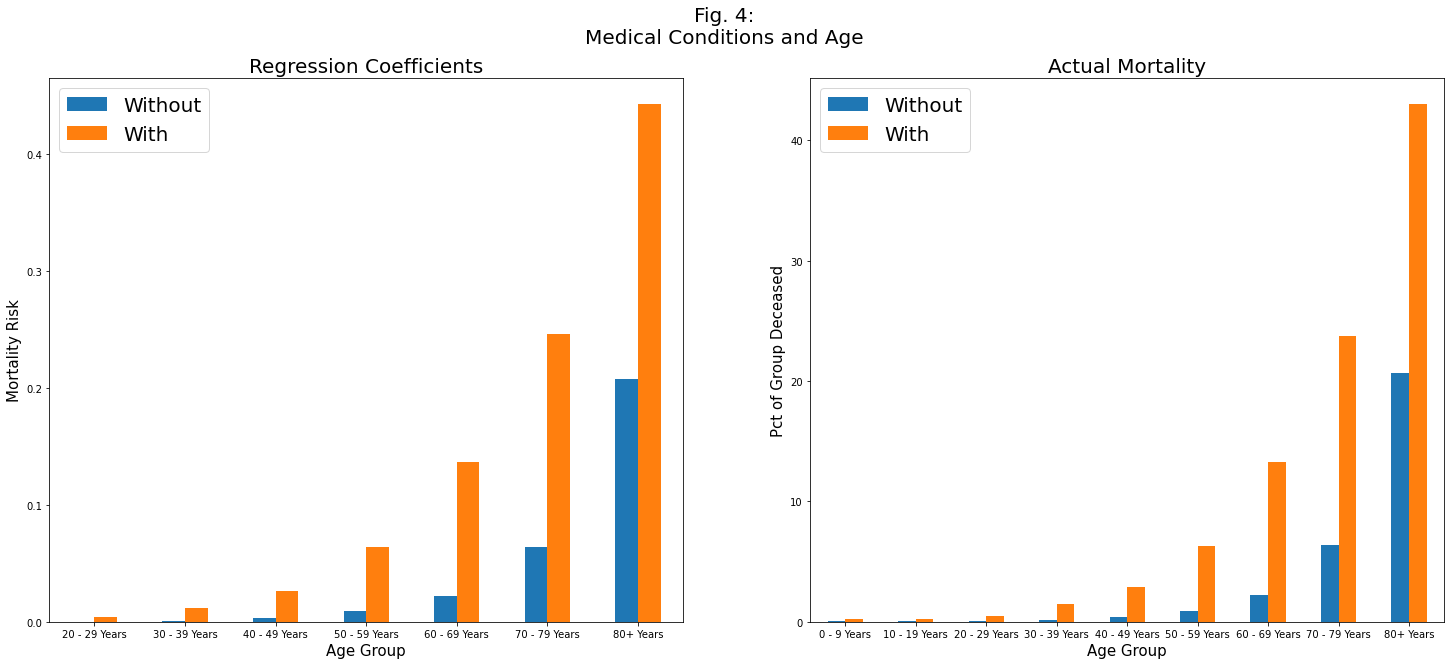

In [5]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 4:\nMedical Conditions and Age', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['20 - 29 Years': '80+ Years']
With = res.params.loc['20 - 29 Years_interact':'80+ Years_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['age_group', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['age_group', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig4_age_and_medcond.png', facecolor = 'white')
plt.show()

# Interpretation
So we already knew from the first regression that age has what looks to be an exponential relationship with mortality risk. Now, we can see that this exponential-looking pattern holds true for the risk added by the presence of pre-existing conditions.
## Now let's copy-paste the above code and analyze ethnicity instead of age

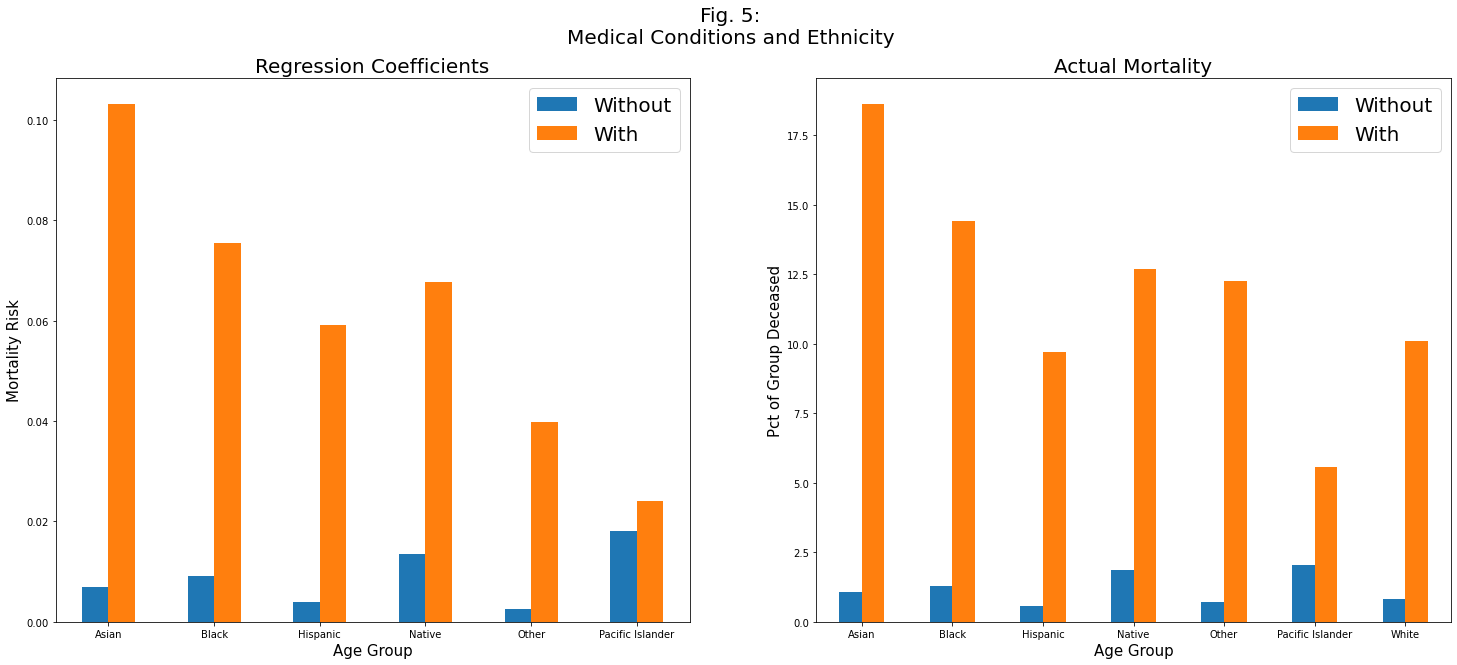

In [6]:
# Plot Setup:
fig, axs = plt.subplots(1, 2, figsize = (25,10))
fig.suptitle('Fig. 5:\nMedical Conditions and Ethnicity', fontsize = 20)

axs[0].set_ylabel('Mortality Risk', fontsize = 15)
axs[1].set_ylabel('Pct of Group Deceased', fontsize = 15)
axs[0].set_title('Regression Coefficients', fontsize = 20)
axs[1].set_title('Actual Mortality', fontsize = 20)


# Coefficients:
Without = res.params.loc['Asian': 'Pacific Islander']
With = res.params.loc['Asian_interact':'Pacific Islander_interact']

coefficients = pd.DataFrame({'Without': Without.values, 'With': Without.values + With.values})
coefficients.set_index(Without.index, inplace = True)

coefficients.plot(kind='bar', ax = axs[0])
axs[0].tick_params(labelrotation = 0)
axs[0].set_xlabel('Age Group', fontsize = 15)
axs[0].legend(['Without', 'With'], fontsize = 20)
#Actual Values:
# Groupby age group and medical condition - compare share of death
sums = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).sum()['death_yn']
counts = df.groupby(['Race and ethnicity (combined)', 'medcond_yn']).count()['death_yn']
compare = pd.merge(sums, counts, left_index = True, right_index = True).rename(columns = {'death_yn_x': 'Total Deaths',
                                                                                         'death_yn_y': 'Total Cases'})
compare['Pct Dead'] = (compare['Total Deaths'] / compare['Total Cases']) * 100
compare = compare['Pct Dead'].unstack().rename(columns= {0: 'Without', 1: 'With'})

compare.plot(kind='bar', ax = axs[1])
axs[1].set_xlabel('Age Group', fontsize = 15)
axs[1].tick_params(labelrotation = 0)
axs[1].legend(['Without', 'With'], fontsize = 20)

plt.savefig('../Images/Regression/fig5_ethnicity_and_medcond.png', facecolor = 'white')
plt.show()

# Interpretation
So this graph tells  us two things:
1. Asian and Black people see the highest increased risk of mortality with the presence of pre-existing conditions
2. The presence of pre-existing medical conditions is a much higher risk factor than what the first model initally suggested 

## Why the big change?
Recall that in the first model, the presence of a medical condition was estimated to increase mortality risk by just 3 percent. When specifying by ethnicity and age, however, we see much larger coefficients for the presence of a medical condition. Why?

One possibility is that the majority of those with medical conditions are young, and they see very little increased risk. If the majority of patients in this dataset are young, then an unspecified regression analysis would see that the majority of those with medical conditions do **not** pass away.

Another possibility is that the majority of those with medical conditions are very old, and the regression has "confused" the effect of age with the effect of medical condition. If the majority of those with medical conditions are 80+ years old, and 80+ year-olds see the highest rate of mortality, then an unspecified regression analysis would see a much stronger correlation between *age* and mortality than between the presence of medical conditions and mortality.

Lets look at the distribution of medical conditions by age and see if either of these guesses are correct.

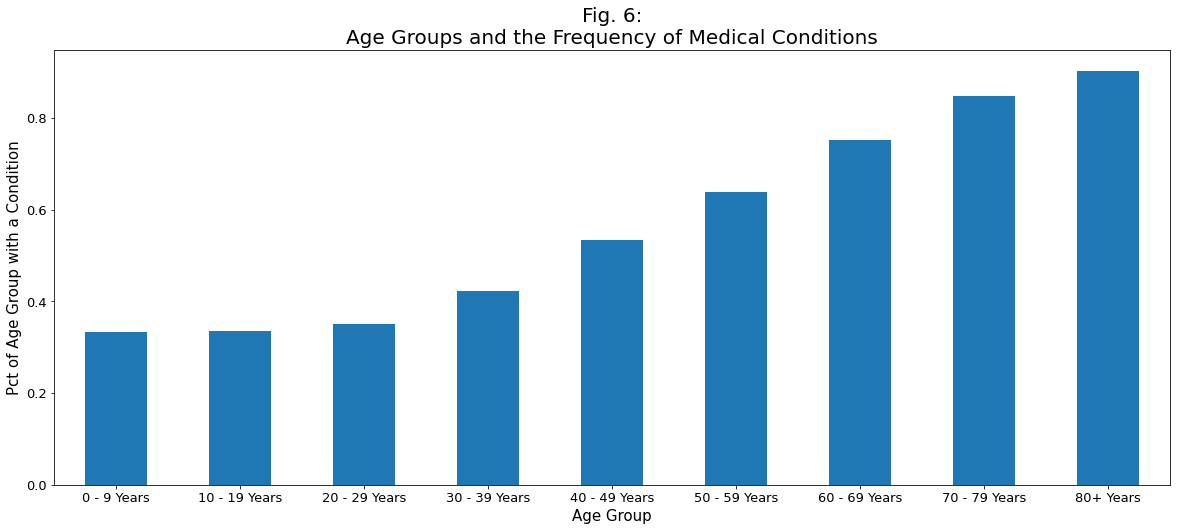

In [7]:
# Group by age group and show intra-group frequency of medical conditions
sums = df.groupby('age_group').sum()['medcond_yn']
counts = df.groupby('age_group').count()['medcond_yn']

totals = pd.DataFrame({'Total With Conditions': sums, 'Total': counts})
totals['Pct'] = totals['Total With Conditions'] / totals['Total']
totals['Pct'].plot(kind = 'bar', figsize = (20,8))
totals['Pct of Pop'] = totals['Total'] / df.shape[0]
plt.ylabel('Pct of Age Group with a Condition', fontsize = 15)
plt.xlabel('Age Group', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Fig. 6:\nAge Groups and the Frequency of Medical Conditions', fontsize = 20)
plt.savefig('../Images/Regression/fig6_age_medcond_distribution.png', facecolor = 'white')
plt.show()

## Age Bias
It does, in fact, look like the presence of medical conditions is heavily skewed with age. Not only that, but the majority of observations in this dataset are of individuals younger than 60 years old. In other words, most observations are of people for whom the presence of a medical condition increases mortality risk by less than 10%

This explains why we see such a huge disparity in the medcond_yn coefficients before and after including the interaction variables.

By specifying the intra-group presence of medical conditions, we have painted a much clearer picture of the causes of mortality 